<a href="https://colab.research.google.com/github/TsabitaNurul/Machine_Learning/blob/main/Save_Model_and_Plot_SVG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 673M/675M [00:05<00:00, 160MB/s]
100% 675M/675M [00:05<00:00, 123MB/s]


In [2]:
api_token = {"username":"tsabita","key":"58e5a6714bc142e9a4c7a1c883dc8f18"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
import os
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
import os
base_dataset = "cell_images"
class_dir = ['Parasitized','Uninfected']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [6]:
from os import mkdir

mkdir('/content/model_cell_images')
mkdir('/content/model_cell_images/train')
mkdir('/content/model_cell_images/train/Parasitized')
mkdir('/content/model_cell_images/train/Uninfected')
mkdir('/content/model_cell_images/validation')
mkdir('/content/model_cell_images/validation/Parasitized')
mkdir('/content/model_cell_images/validation/Uninfected')

In [7]:
import os
import shutil

Parasitized_original = "/content/cell_images/Parasitized"
Parasitized_train = "/content/model_cell_images/train/Parasitized"
Parasitized_validation = "/content/model_cell_images/validation/Parasitized"

files = os.listdir(Parasitized_original)

# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_train)

In [8]:
files2 = os.listdir(Parasitized_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_validation)

In [9]:
Uninfected_original = "/content/cell_images/Uninfected"
Uninfected_train = "/content/model_cell_images/train/Uninfected"
Uninfected_validation = "/content/model_cell_images/validation/Uninfected"

filesUn = os.listdir(Uninfected_original)

# memindahkan 70% file
for file in filesUn[0:int(len(filesUn) * .7)]:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_train)

In [10]:
files2Un = os.listdir(Uninfected_original)

# memindahkan sisa(seluruh file)
for file in files2Un:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_validation)

In [11]:
file_train_Para = os.listdir(Parasitized_train)
file_Val_Para = os.listdir(Parasitized_validation)
file_train_Un = os.listdir(Uninfected_train)
file_Val_Un = os.listdir(Uninfected_validation)

print(file_train_Para[0:int(len(file_train_Para) * .001)])
print("data Parasitized train : " + str(len(file_train_Para)))
print("data Parasitized validation : " + str(len(file_Val_Para)))
print("data Uninfected train : " + str(len(file_train_Un)))
print("data Uninfected validation : " + str(len(file_Val_Un)))

['C82P43ThinF_IMG_20150817_124728_cell_18.png', 'C101P62ThinF_IMG_20150918_151335_cell_75.png', 'C119P80ThinF_IMG_20151002_122720_cell_164.png', 'C159P120ThinF_IMG_20151115_185541_cell_180.png', 'C68P29N_ThinF_IMG_20150819_134326_cell_134.png', 'C70P31_ThinF_IMG_20150819_141730_cell_102.png', 'C123P84ThinF_IMG_20151002_151143_cell_189.png', 'C46P7ThinF_IMG_20151130_210843_cell_136.png', 'C175P136NThinF_IMG_20151127_141325_cell_225.png']
data Parasitized train : 9645
data Parasitized validation : 4134
data Uninfected train : 9645
data Uninfected validation : 4134


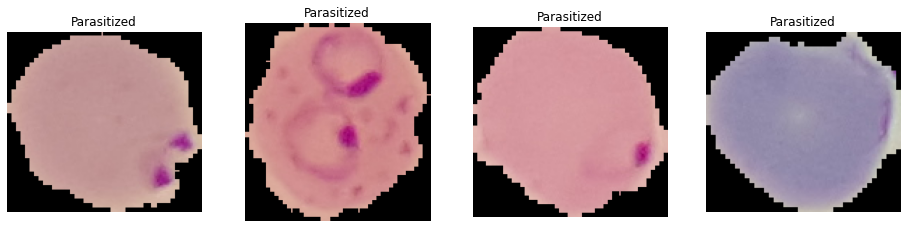

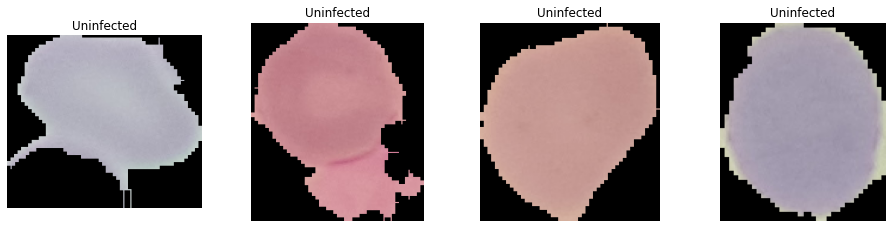

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

Parasitized_dir=os.path.join('/content/model_cell_images/train/Parasitized')
Uninfected_dir=os.path.join('/content/model_cell_images/train/Uninfected')

Parasitized_image = os.listdir(Parasitized_dir)
Uninfected_image = os.listdir(Uninfected_dir)

fname1 = [os.path.join(Parasitized_dir,fname)
        for fname in Parasitized_image[:4]]

fname2 = [os.path.join(Uninfected_dir,fname)
        for fname in Uninfected_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Parasitized')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Uninfected')
    plt.imshow(img)
    
plt.show()

Preprocessing

In [13]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/model_cell_images/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/model_cell_images/validation')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [15]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (19290, 100, 100, 3)
Train Label =  (19290,)
Validation Data =  (8268, 100, 100, 3)
Validation Label =  (8268,)


In [16]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [17]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized'
 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


Modelling

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0

In [19]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
965/965 [==============================] - 212s 219ms/step - loss: 0.3796 - acc: 0.8096 - val_loss: 0.1491 - val_acc: 0.9559
Epoch 2/15
965/965 [==============================] - 220s 228ms/step - loss: 0.1474 - acc: 0.9511 - val_loss: 0.1315 - val_acc: 0.9590
Epoch 3/15
965/965 [==============================] - 216s 224ms/step - loss: 0.1295 - acc: 0.9562 - val_loss: 0.1257 - val_acc: 0.9608
Epoch 4/15
965/965 [==============================] - 209s 217ms/step - loss: 0.1176 - acc: 0.9596 - val_loss: 0.1263 - val_acc: 0.9589
Epoch 5/15
965/965 [==============================] - 214s 222ms/step - loss: 0.0995 - acc: 0.9649 - val_loss: 0.1423 - val_acc: 0.9552
Epoch 6/15
965/965 [==============================] - 213s 221ms/step - loss: 0.0822 - acc: 0.9710 - val_loss: 0.1410 - val_acc: 0.9556
Epoch 7/15
965/965 [==============================] - 209s 216ms/step - loss: 0.0670 - acc: 0.9765 - val_loss: 0.1684 - val_acc: 0.9554
Epoch 8/15
965/965 [============================

Save Model 

In [24]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/medium_project/model.h5...


Evaluasi Model dan Save Plot

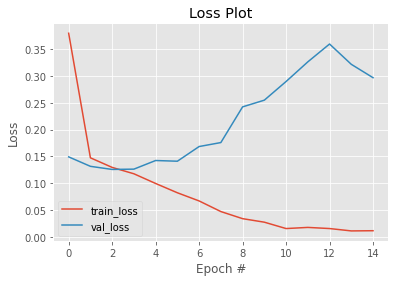

<Figure size 432x288 with 0 Axes>

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
#save plot svg
plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

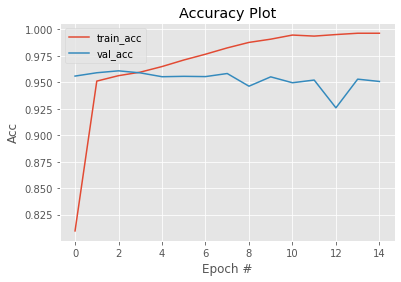

<Figure size 432x288 with 0 Axes>

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()
#save plot svg
plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

In [23]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4134
           1       0.94      0.96      0.95      4134

    accuracy                           0.95      8268
   macro avg       0.95      0.95      0.95      8268
weighted avg       0.95      0.95      0.95      8268

